Loading Data in Pandas DataFrame format
Use nrows to limit data analise to get faster (but limited) results. If you wan all data put a huge value in this var.

In [1]:
import pandas as pd
from Util import loadJson,loadCsv,saveJson

nrows = -1
data1 = loadCsv('P-BMP280-measures.csv','P-BMP280',nrows);
data2 = loadCsv('T-BMP280-measures.csv','T-BMP280',nrows);

As we make an outer join we can view that some rows no has value on same time on each other.

In [2]:
data= data1.join(data2.set_index('time'), on='time', how='outer', sort=True )
print(data.isna().sum())

data= data1.join(data2.set_index('time'), on='time', how='inner', sort=True )
print(data.isna().sum())


P-BMP280    81681
time            0
T-BMP280    81674
dtype: int64
P-BMP280    0
time        0
T-BMP280    0
dtype: int64


We can view graphically that holes in data are common for P and T data. But, data that are registred is correct.


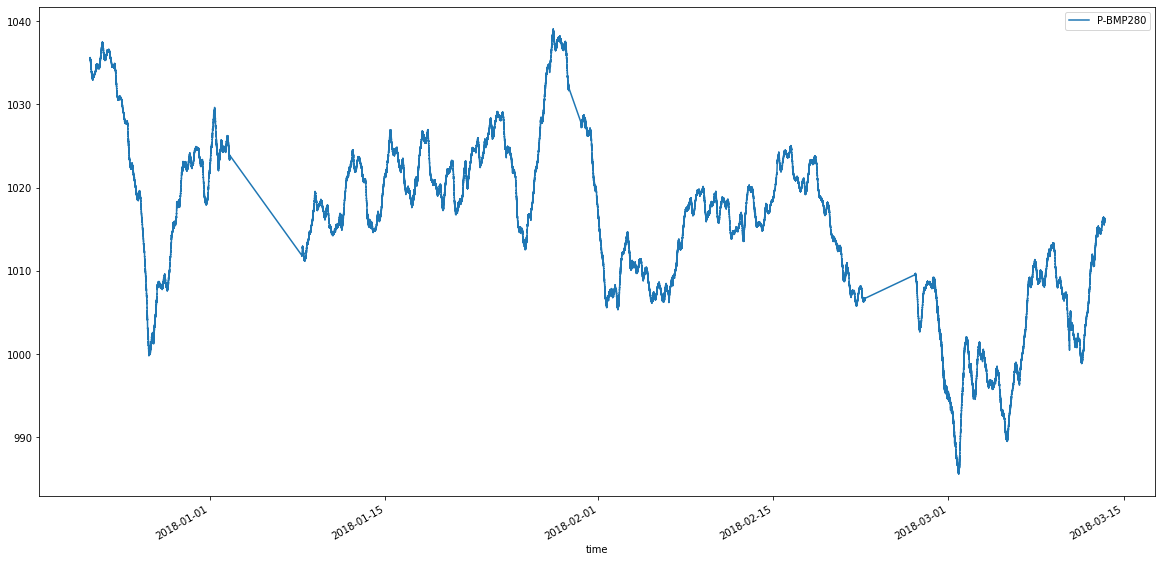

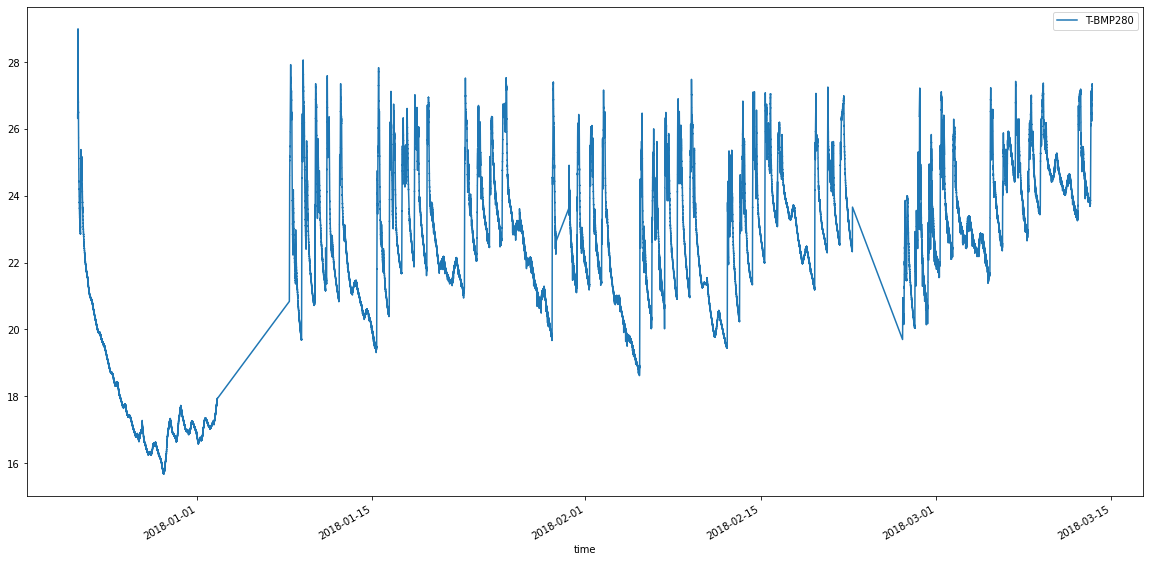

In [3]:
data.describe()
#data.plot.line(x = 'time',figsize=(20,10))
data.plot.line(x = 'time',y=['P-BMP280'],figsize=(20,10))
data.plot.line(x = 'time',y=['T-BMP280'],figsize=(20,10))

Finally, we save data combined to further use

In [4]:
saveJson("BMP280-measures.json", data)